In [1]:
# Import necessary libraries
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
import re
from nltk.corpus import stopwords
import string
from nltk.stem import WordNetLemmatizer

In [2]:
# Download NLTK resources if not already downloaded
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Your lemmatizer, stop words, and punctuations setup
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

In [4]:
# Read the CSV file
sentiment_data = pd.read_csv('Tweets.csv')

In [7]:
#View the dataset 
sentiment_data.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


In [8]:
# Filter data based on confidence level that one might obtain a more accurate model
sentiment_df = sentiment_data[sentiment_data['airline_sentiment_confidence'] >= 0.5]

In [9]:
# Preprocess the text data
def preprocess_text(text):
    # Remove non-alphabetic characters
    text = re.sub('[^a-zA-Z]', ' ', text)
    # Convert to lowercase and split into words
    text = text.lower().split()
    # Lemmatize words and remove stop words and punctuations
    text = [lemmatizer.lemmatize(word) for word in text if (word not in stop_words) and (word not in punctuations)]
    return ' '.join(text)

In [10]:

sentiment_df['clean_text'] = sentiment_df['text'].apply(preprocess_text)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1972562914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['clean_text'] = sentiment_df['text'].apply(preprocess_text)
C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1972562914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['clean_text'] = sentiment_df['text'].apply(preprocess_text)


In [48]:
# Print all unique sentiments in the 'airline_sentiment' column
unique_sentiments = sentiment_df['airline_sentiment'].unique()
print(unique_sentiments)

['neutral' 'negative' 'positive']
['neutral' 'negative' 'positive']


In [16]:
# Define sentiments
sentiments = ['negative', 'neutral', 'positive']
sentiment_df['encoded_sentiment'] = sentiment_df['airline_sentiment'].apply(lambda x: sentiments.index(x))

C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1034451960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['encoded_sentiment'] = sentiment_df['airline_sentiment'].apply(lambda x: sentiments.index(x))
C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1034451960.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['encoded_sentiment'] = sentiment_df['airline_sentiment'].apply(lambda x: sentiments.index(x))


In [17]:
# Split data into features and labels
X = sentiment_df['clean_text']
Y = sentiment_df['encoded_sentiment']

In [18]:
# Use TextBlob for sentiment analysis
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [19]:
# Train the model
predicted_sentiments = X_test.apply(lambda x: TextBlob(x).sentiment.polarity)
predicted_sentiments = predicted_sentiments.apply(lambda x: 0 if x < 0 else (1 if x == 0 else 2))

In [20]:
# Evaluate the model
classification = classification_report(Y_test, predicted_sentiments)
print(classification)

              precision    recall  f1-score   support

           0       0.90      0.33      0.48      2747
           1       0.30      0.57      0.39       880
           2       0.33      0.79      0.47       695

    accuracy                           0.45      4322
   macro avg       0.51      0.56      0.45      4322
weighted avg       0.69      0.45      0.46      4322

              precision    recall  f1-score   support

           0       0.90      0.33      0.48      2747
           1       0.30      0.57      0.39       880
           2       0.33      0.79      0.47       695

    accuracy                           0.45      4322
   macro avg       0.51      0.56      0.45      4322
weighted avg       0.69      0.45      0.46      4322



In [28]:
# Example prediction using the trained model
input_text = "i really enjoyed the flight and was able to rest well"
input_text = preprocess_text(input_text)
predicted_sentiment = TextBlob(input_text).sentiment.polarity
predicted_sentiment = 0 if predicted_sentiment < 0 else (1 if predicted_sentiment == 0 else 2)

print(f"The sentiment of the phrase  is: {sentiments[predicted_sentiment]}")

The sentiment of the phrase  is: positive
The sentiment of the phrase  is: positive


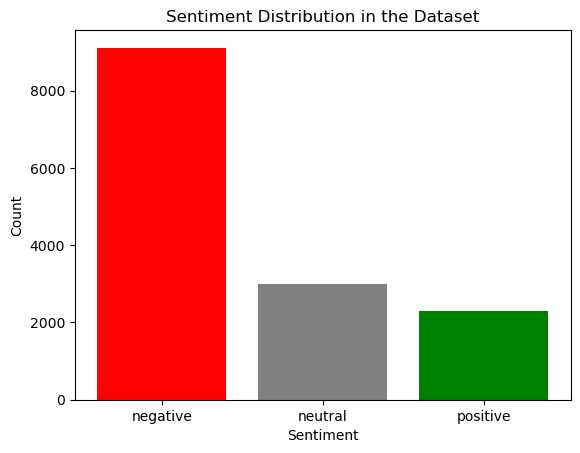

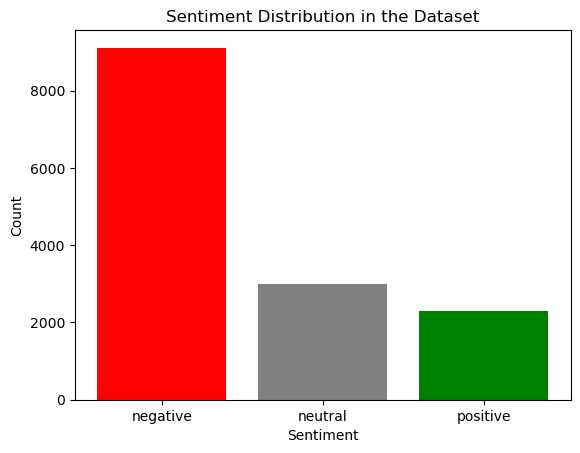

In [23]:
# Visualize the distribution of sentiments in the dataset
sentiment_counts = sentiment_df['encoded_sentiment'].value_counts()
plt.bar(sentiments, sentiment_counts, color=['red', 'grey', 'green'])
plt.title('Sentiment Distribution in the Dataset')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [31]:
sentiment_df['tweet_created'] = pd.to_datetime(sentiment_df['tweet_created'], format='%Y-%m-%d %H:%M:%S %z')
sentiment_df['year'] = sentiment_df['tweet_created'].dt.year
sentiment_df['month'] = sentiment_df['tweet_created'].dt.month
sentiment_df['day'] = sentiment_df['tweet_created'].dt.day
sentiment_df['hour'] = sentiment_df['tweet_created'].dt.hour
sentiment_df['minute'] = sentiment_df['tweet_created'].dt.minute
sentiment_df['second'] = sentiment_df['tweet_created'].dt.second
sentiment_df['timezone'] = sentiment_df['tweet_created'].dt.tz



C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1033093366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['tweet_created'] = pd.to_datetime(sentiment_df['tweet_created'], format='%Y-%m-%d %H:%M:%S %z')
C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1033093366.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sentiment_df['year'] = sentiment_df['tweet_created'].dt.year
C:\Users\DELL\AppData\Local\Temp\ipykernel_12480\1033093366.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sentiment_df already has the 'year', 'month', 'day', 'encoded_sentiment' columns

# Group by year and sentiment
yearly_sentiments = sentiment_df.groupby(['year', 'encoded_sentiment']).size().unstack()

# Group by month and sentiment
monthly_sentiments = sentiment_df.groupby(['month', 'encoded_sentiment']).size().unstack()

# Group by day and sentiment
daily_sentiments = sentiment_df.groupby(['day', 'encoded_sentiment']).size().unstack()





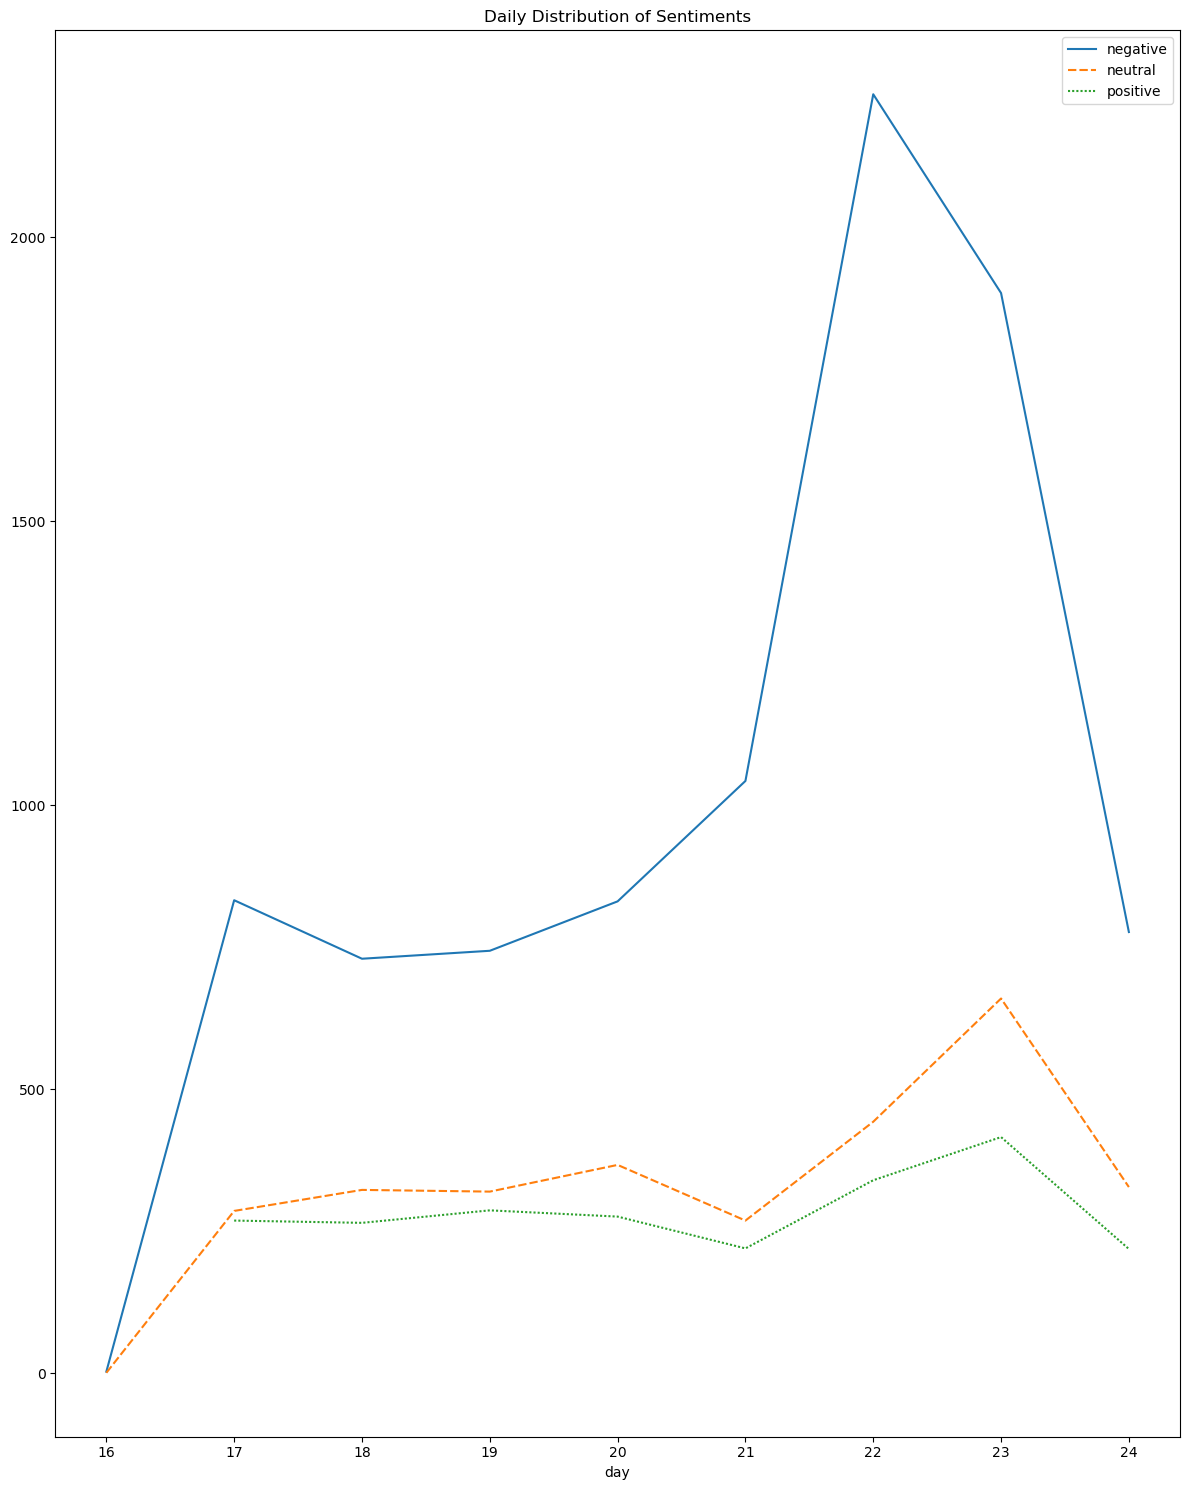

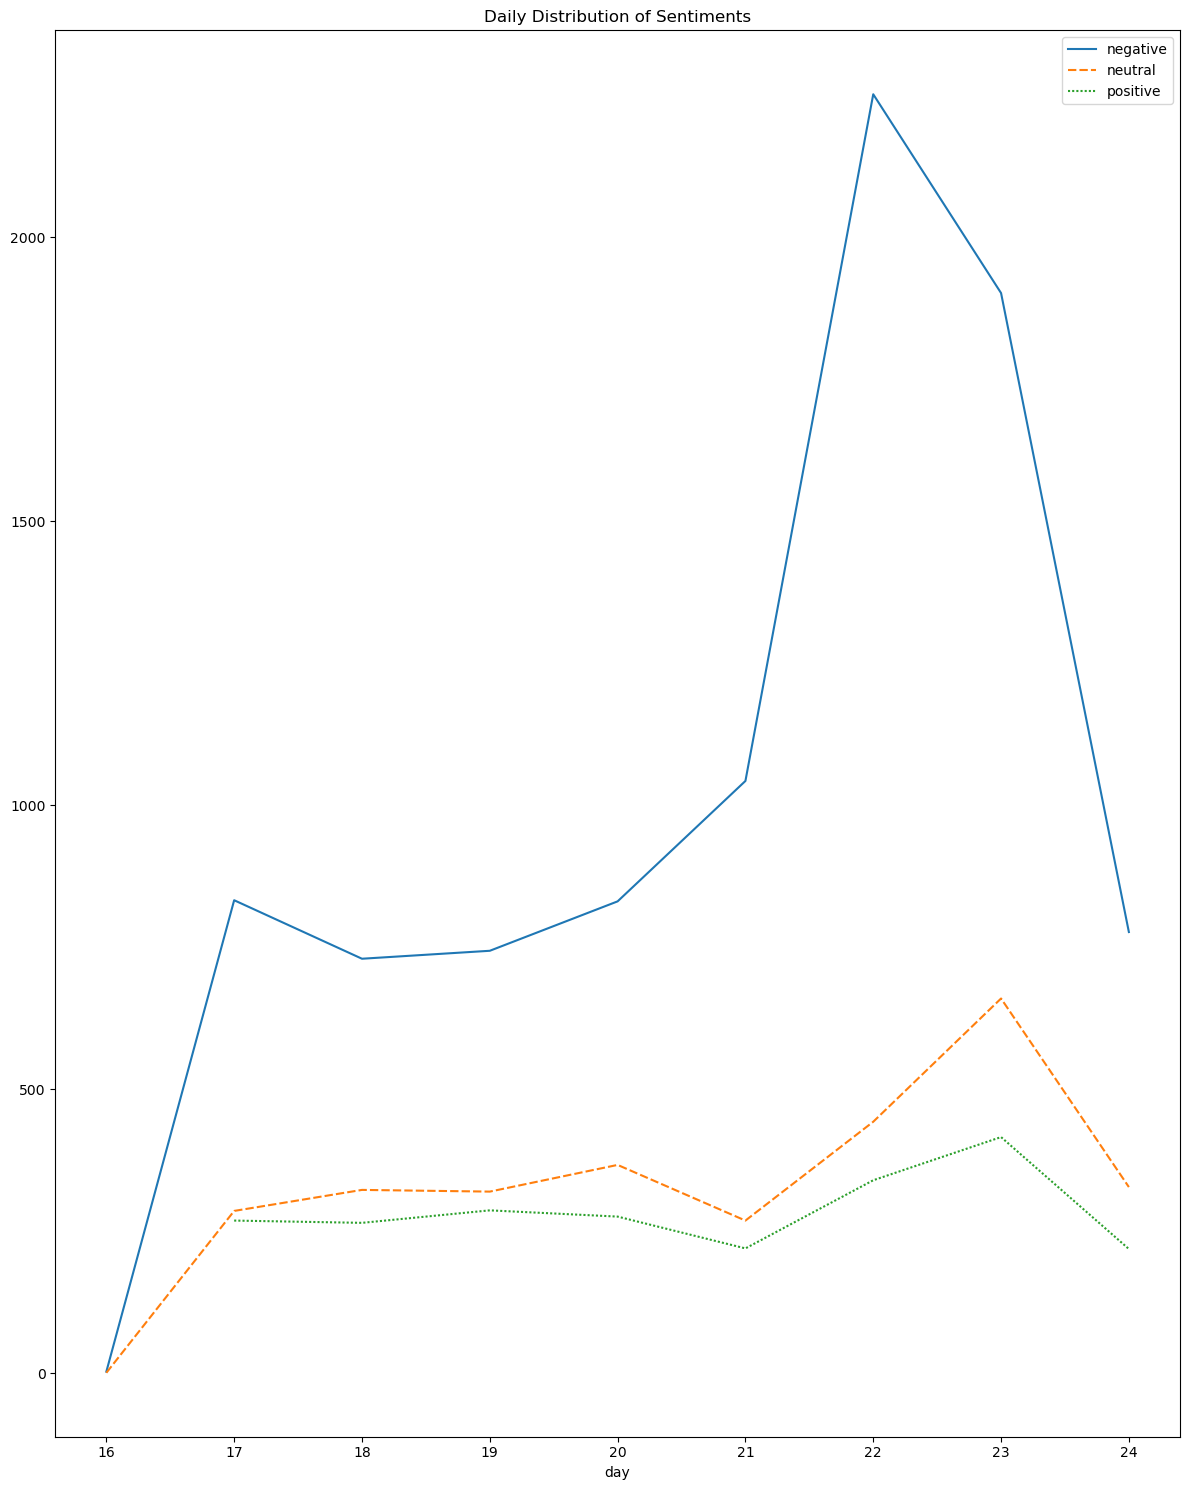

In [40]:
# Plotting
import seaborn as sns

fig, axes = plt.subplots(1, 1, figsize=(12, 15))

# Daily distribution
sns.lineplot(data=daily_sentiments, ax=axes)
axes.set_title('Daily Distribution of Sentiments')

plt.tight_layout()
plt.show()


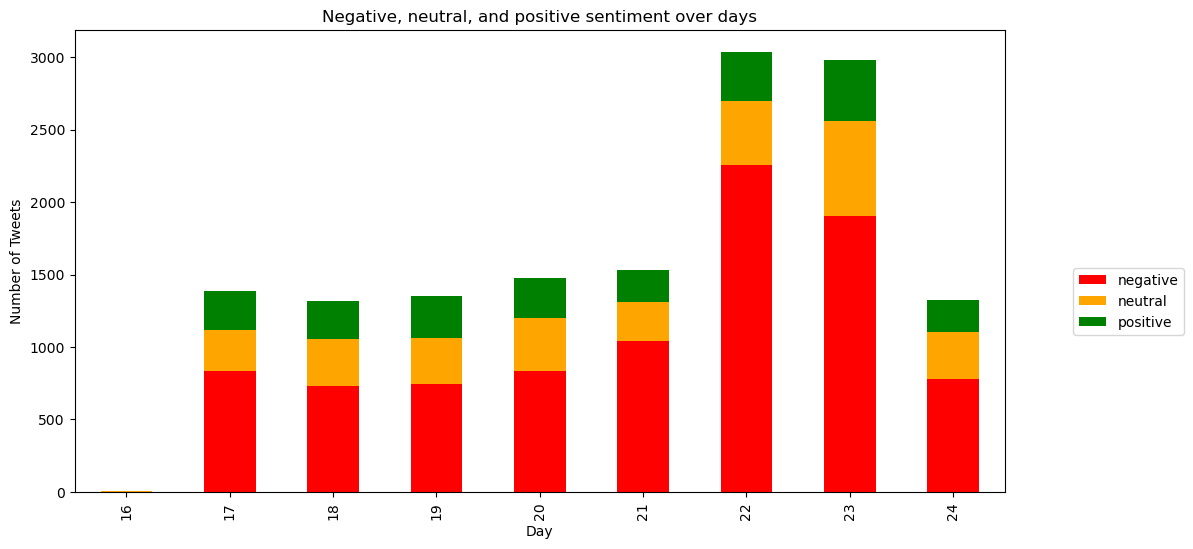

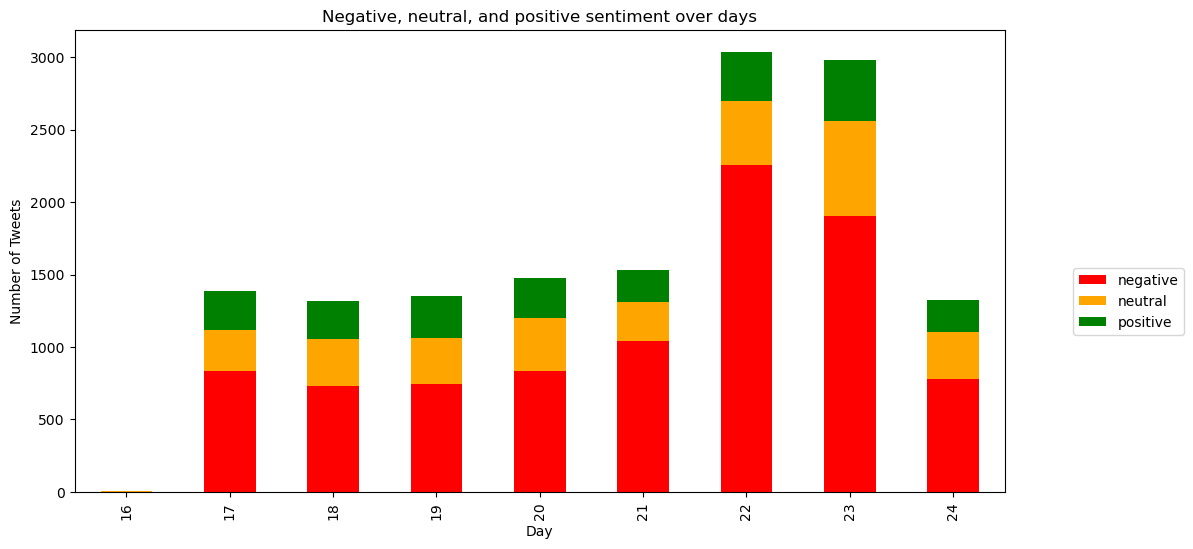

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming sentiment_df already has the 'day', 'encoded_sentiment' columns

# Group by day and sentiment
daily_sentiments = sentiment_df.groupby(['day', 'encoded_sentiment']).size().unstack()

# Plotting
TITLE = "Negative, neutral, and positive sentiment over days"
COLORS = ["red", "orange", "green"]

# Change the column names to 'negative', 'positive', and 'neutral'
daily_sentiments.columns = ['negative', 'neutral', 'positive']

# Plot a stacked bar chart
daily_sentiments.plot.bar(stacked=True, figsize=(12, 6), title=TITLE, color=COLORS).legend(bbox_to_anchor=(1.2, 0.5))
plt.xlabel('Day')
plt.ylabel('Number of Tweets')
plt.show()


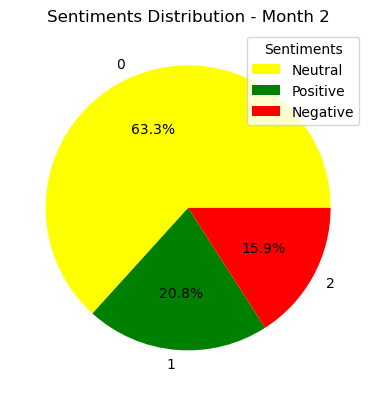

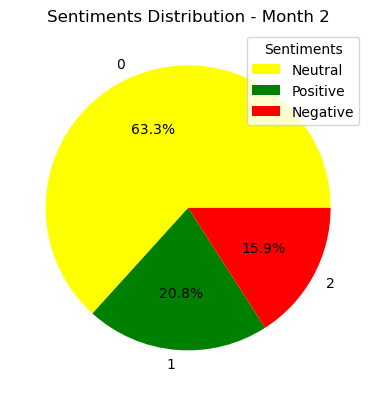

In [46]:

import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'sentiment_df' with columns 'month' and 'encoded_sentiment'
# Replace 'encoded_sentiment' with the actual column name containing sentiment labels

# Group by month and sentiment and count occurrences
monthly_sentiments = sentiment_df.groupby(['month', 'encoded_sentiment']).size().unstack()

# Plot a pie chart for each month
months = monthly_sentiments.index
colors = ['yellow', 'green', 'red']  # Adjust colors based on your sentiment encoding

plt.figure(figsize=(15, 15))

for i, month in enumerate(months, 1):
    plt.subplot(3, 4, i)
    plt.pie(monthly_sentiments.loc[month], labels=monthly_sentiments.columns, colors=colors, autopct='%1.1f%%')
    plt.title(f'Sentiments Distribution - Month {month}')
    plt.legend(title='Sentiments', loc='upper right', labels=['Neutral', 'Positive', 'Negative'])

plt.tight_layout()
#plt.show()




In [ ]:
# Title: Exploring Sentiment Analysis on Airline-Related Tweets

# Introduction:
# The sentiment analysis project on airline-related tweets aims to delve into the sentiments expressed by users on social media
#platforms regarding their experiences with airlines. Leveraging a dataset sourced from Kaggle.com,("https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment")',
#' the project encompasses a series of well-defined steps. It combines natural language processing (NLP) techniques, machine 
#learning, and visualization methods to gain valuable insights into the sentiments of users.

# Data Preprocessing:
# The initial phase involves importing essential libraries, including pandas for data manipulation, TextBlob for sentiment 
#analysis, and scikit-learn for model evaluation. The NLTK library is utilized to download resources such as stopwords, 
#punctuation, and a lemmatizer for text processing. The dataset, containing tweets related to airlines, is loaded into a 
#Pandas DataFrame ('sentiment_data').

# Data Filtering and Text Preprocessing:
# To ensure the reliability of sentiment labels, tweets with low confidence levels are filtered out. A text preprocessing
#function is defined to clean and structure the text data. This involves removing non-alphabetic characters, converting text 
#to lowercase, splitting it into words, lemmatizing, and eliminating stopwords and punctuation. The result is a new 'clean_text'
#column in the DataFrame.

# Sentiment Label Encoding:
# Sentiments are categorized into 'negative,' 'neutral,' and 'positive.' To facilitate machine learning, these categorical 
#labels are encoded into numerical values (0, 1, 2) using the apply function.

# Train-Test Split and Model Training:
# The dataset is divided into training and testing sets using the train_test_split function. TextBlob, a natural language 
#processing library, is employed to perform sentiment analysis on the textual data. A basic sentiment prediction model is 
#trained using TextBlob's polarity score.

# Evaluation and Visualization:
# The performance of the sentiment prediction model is evaluated using scikit-learn's classification report. This report 
#provides metrics such as precision, recall, and F1-score for each sentiment class. A bar chart is then employed to visually 
#represent the distribution of sentiments in the dataset. This offers a clear depiction of the count for each sentiment class.

# Temporal Analysis:
# Temporal features, including year, month, day, hour, minute, second, and timezone, are extracted from the 'tweet_created' 
#column. A line plot is utilized to visualize the daily distribution of sentiments. This offers insights into how sentiments 
#evolve over the course of days.

# Further Temporal Analysis:
# Building upon daily insights, a stacked bar chart is employed to explore sentiment distribution over days. This provides a 
#nuanced understanding of sentiment patterns.

# Sentiment Analysis Over Months:
# The temporal exploration extends to a monthly level, where sentiments are grouped and analyzed. Customized pie charts for 
#each month provide a succinct visual representation of sentiment distribution. This aids in the identification of trends.

# Conclusion:
# In conclusion, this sentiment analysis project offers a comprehensive approach to understanding the sentiments expressed 
#in airline-related tweets. Through effective data preprocessing, model training, evaluation, and sophisticated visualizations, 
#the project provides valuable insights into the evolving sentiments of users over time. This approach not only aids in gauging 
#public opinion but also showcases the power of combining NLP and machine learning techniques for a nuanced analysis of social
#media data.
